# Coffee Shop Sales Analysis

**5 key objectives** :

1. **Identify Top-selling Products by Revenue and Quantity**:
   - Objective: Determine which products and categories (e.g., Coffee, Tea) generate the highest revenue and total sales volume across all stores.

2. **Analyze Store Performance**:
   - Objective: Compare sales performance across store locations to identify high and low-performing stores. Investigate factors driving success in top-performing locations.

3. **Perform BCG Analysis for Product Types**:
   - Objective: Classify products into **Stars, Cash Cows, Dogs, and Question Marks** based on their market growth and sales share to guide strategic decision-making on product focus.

4. **Identify Peak Sales Times and Days**:
   - Objective: Analyze sales patterns by day of the week and time of day to understand when stores experience the highest traffic. This can help optimize staffing and inventory levels.

5. **Explore the Impact of Product Size on Sales**:
   - Objective: Evaluate whether product size (e.g., small, regular, large) influences sales performance. Investigate if larger sizes drive more revenue or if customers prefer smaller sizes for certain product types.

## Import Library and Data

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_excel('C:/Users/user/OneDrive/Documents/GitHub/Data-Analysis-Portfolio/coffee-shop-sales/Coffee Shop Sales.xlsx')
# df = pd.read_excel('C:/Users/Eugene/Documents/GitHub/Data-Analysis-Portfolio/coffee-shop-sales/Coffee Shop Sales.xlsx')

In [3]:
df.sample(10)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
36576,36633,2023-03-05,12:40:54,1,5,Lower Manhattan,69,3.25,Bakery,Biscotti,Hazelnut Biscotti
38503,38610,2023-03-08,10:06:06,1,8,Hell's Kitchen,46,2.50,Tea,Brewed Green tea,Serenity Green Tea Rg
3649,3679,2023-01-07,13:05:03,2,8,Hell's Kitchen,31,2.20,Coffee,Gourmet brewed coffee,Ethiopia Sm
86913,87167,2023-05-07,10:25:49,2,5,Lower Manhattan,37,3.00,Coffee,Barista Espresso,Espresso shot
48765,48872,2023-03-22,16:03:26,3,5,Lower Manhattan,48,2.50,Tea,Brewed Black tea,English Breakfast Rg
140760,141097,2023-06-23,14:45:01,1,8,Hell's Kitchen,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
14521,14551,2023-01-26,10:08:28,1,8,Hell's Kitchen,53,3.00,Tea,Brewed Chai tea,Traditional Blend Chai Lg
135562,135899,2023-06-19,09:07:22,1,3,Astoria,77,3.00,Bakery,Scone,Oatmeal Scone
41735,41842,2023-03-12,17:47:24,1,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
100617,100871,2023-05-19,11:28:53,1,3,Astoria,39,4.25,Coffee,Barista Espresso,Latte Rg


## Initial Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [5]:
df.shape

(149116, 11)

In [6]:
df.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [7]:
df.duplicated().any()

False

In [8]:
df.nunique().reset_index()

,index,0
0,transaction_id,149116
1,transaction_date,181
2,transaction_time,25762
3,transaction_qty,6
4,store_id,3
5,store_location,3
6,product_id,80
7,unit_price,41
8,product_category,9
9,product_type,29


In [9]:
df.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


In [10]:
df.describe(include= object)

,transaction_time,store_location,product_category,product_type,product_detail
count,149116,149116,149116,149116,149116
unique,25762,3,9,29,80
top,09:31:15,Hell's Kitchen,Coffee,Brewed Chai tea,Chocolate Croissant
freq,41,50735,58416,17183,3076


## Preprocessing

### Handle Data Type

In [11]:
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.time

### Enhance Data Quality

Extract the size and name from the column `product_detail`.

In [12]:
# Define a function to extract the product size and product name
def extract_product_info(product_detail):
    # Define patterns for size and format
    size_pattern = r'(Rg|Lg|Sm|shot|syrup)$'
    
    # Match size
    size_match = re.search(size_pattern, product_detail)
    
    if size_match:
        # Map size abbreviations to full names
        size_map = {'Rg': 'regular', 'Lg': 'large', 'Sm': 'small', 'shot': 'shot', 'syrup': 'syrup'}
        product_size = size_map.get(size_match.group(), 'unknown')
        
        # Remove size from product name
        product_name = re.sub(size_pattern, '', product_detail).strip()
    else:
        # If no size is found, set size as 'unknown' and product name as original detail
        product_size = 'unknown'
        product_name = product_detail.strip()

    return product_size, product_name

In [13]:
df[['product_size', 'product_name']] = df['product_detail'].apply(lambda x: pd.Series(extract_product_info(x)))

Generate new column name `revenue`, where it contain the calculation value from transaction quantity `transaction_qty` multiply with unit price `unit_price`.

In [18]:
df['revenue'] = df['transaction_qty'] * df['unit_price']

Extract day, month, and month's name from transaction_date to analyze time-based trends.

In [31]:
df['transaction_day'] = df['transaction_date'].dt.day_name()
df['transaction_month'] = df['transaction_date'].dt.month
df['transaction_month_name'] = df['transaction_date'].dt.month_name()

Extract hour from transaction_time with specified format into hourly based.

In [15]:
df['transaction_hour'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.hour

Store the order for Month and Day for the better analysis, visualization, and insights in separate variables.

In [47]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   transaction_id          149116 non-null  int64         
 1   transaction_date        149116 non-null  datetime64[ns]
 2   transaction_time        149116 non-null  object        
 3   transaction_qty         149116 non-null  int64         
 4   store_id                149116 non-null  int64         
 5   store_location          149116 non-null  object        
 6   product_id              149116 non-null  int64         
 7   unit_price              149116 non-null  float64       
 8   product_category        149116 non-null  object        
 9   product_type            149116 non-null  object        
 10  product_detail          149116 non-null  object        
 11  product_size            149116 non-null  object        
 12  product_name            149116

In [32]:
df['transaction_month'].value_counts()

transaction_month
6    35352
5    33527
4    25335
3    21229
1    17314
2    16359
Name: count, dtype: int64

## Analysis

### Identify Top-Selling Products Category by Revenue and Quantity

Determine which products and categories (e.g., Coffee, Tea) generate the highest revenue and total sales volume across all stores.

In [19]:
# Group by product type and product name to calculate total quantity and revenue
product_sales  = df.groupby(['product_type', 'product_category']).agg({
    'transaction_qty': 'sum',
    'revenue': 'sum'
}).reset_index()

In [20]:
top_products_by_revenue = product_sales.sort_values(by='revenue', ascending=False)
top_products_by_revenue 

,product_type,product_category,transaction_qty,revenue
0,Barista Espresso,Coffee,24943,91406.20
4,Brewed Chai tea,Tea,26250,77081.95
17,Hot chocolate,Drinking Chocolate,17457,72416.00
13,Gourmet brewed coffee,Coffee,25973,70034.60
3,Brewed Black tea,Tea,17462,47932.00
6,Brewed herbal tea,Tea,17328,47539.50
25,Premium brewed coffee,Coffee,12431,38781.15
22,Organic brewed coffee,Coffee,13012,37746.50
27,Scone,Bakery,10465,36866.12
10,Drip coffee,Coffee,12891,31984.00


In [21]:
top_products_by_quantity  = product_sales.sort_values(by='transaction_qty', ascending=False)
top_products_by_quantity 

,product_type,product_category,transaction_qty,revenue
4,Brewed Chai tea,Tea,26250,77081.95
13,Gourmet brewed coffee,Coffee,25973,70034.60
0,Barista Espresso,Coffee,24943,91406.20
3,Brewed Black tea,Tea,17462,47932.00
17,Hot chocolate,Drinking Chocolate,17457,72416.00
6,Brewed herbal tea,Tea,17328,47539.50
22,Organic brewed coffee,Coffee,13012,37746.50
10,Drip coffee,Coffee,12891,31984.00
25,Premium brewed coffee,Coffee,12431,38781.15
27,Scone,Bakery,10465,36866.12


### Analyze Store Performance

Compare sales performance across store locations to identify high and low-performing stores. Investigate factors driving success in top-performing locations.

In [46]:
# Calculate total quantity sold per store per month
monthly_transaction_qty = df.groupby(['store_location', 'transaction_month_name'])['transaction_qty'].sum().reset_index()

# Rename the total_quantity column
monthly_transaction_qty.rename(columns={'transaction_qty': 'total_quantity'}, inplace=True)

# Pivot the data so each month is a separate column
monthly_transaction_qty_pivot = monthly_transaction_qty.pivot(index='store_location', columns='transaction_month_name', values='total_quantity')

# Ensure the months are in the correct order
month_order = ['January', 'February', 'March', 'April', 'May', 'June']
monthly_transaction_qty_pivot = monthly_transaction_qty_pivot[month_order]

# Fill any missing values with 0 (if some months have no data for a particular store)
monthly_transaction_qty_pivot.fillna(0, inplace=True)

# Reset the index to get the 'store_location' as a normal column
monthly_transaction_qty_pivot.reset_index(inplace=True)

# Drop the transaction_month_name column if it exists
monthly_transaction_qty_pivot.index.name = None  # Remove index name
monthly_transaction_qty_pivot.columns.name = None  # Remove columns name

print("Pivoted Monthly Transaction Quantity:")
monthly_transaction_qty_pivot

Pivoted Monthly Transaction Quantity:


C:\Users\user\AppData\Local\Temp\ipykernel_7760\3057062999.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_transaction_qty = df.groupby(['store_location', 'transaction_month_name'])['transaction_qty'].sum().reset_index()


,store_location,January,February,March,April,May,June
0,Astoria,8281,7718,9999,12026,16114,16853
1,Hell's Kitchen,8340,7937,10198,12194,15944,17124
2,Lower Manhattan,8249,7895,10209,12249,16175,16965


In [49]:
# Calculate total Revenue per store per month
monthly_revenue = df.groupby(['store_location', 'transaction_month_name'])['revenue'].sum().reset_index()

# Rename the revenue column
monthly_revenue.rename(columns={'revenue': 'revenue'}, inplace=True)

# Pivot the data so each month is a separate column
monthly_revenue_pivot = monthly_revenue.pivot(index='store_location', columns='transaction_month_name', values='revenue')

# Ensure the months are in the correct order
monthly_revenue_pivot = monthly_revenue_pivot[month_order]

# Fill any missing values with 0 (if some months have no data for a particular store)
monthly_revenue_pivot.fillna(0, inplace=True)

# Reset the index to get the 'store_location' as a normal column
monthly_revenue_pivot.reset_index(inplace=True)

# Drop the transaction_month_name column if it exists
monthly_revenue_pivot.index.name = None
monthly_revenue_pivot.columns.name = None

print("Pivoted Monthly Revenue:")
monthly_revenue_pivot

Pivoted Monthly Revenue:


C:\Users\user\AppData\Local\Temp\ipykernel_7760\2480084108.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_revenue = df.groupby(['store_location', 'transaction_month_name'])['revenue'].sum().reset_index()


,store_location,January,February,March,April,May,June
0,Astoria,27313.66,25105.34,32835.43,39477.61,52428.76,55083.11
1,Hell's Kitchen,27820.65,25719.80,33110.57,40304.14,52598.93,56957.08
2,Lower Manhattan,26543.43,25320.05,32888.68,39159.33,51700.07,54445.69


In [50]:
# Calculate total transaction per store per month
monthly_transaction_count = df.groupby(['store_location', 'transaction_month_name'])['transaction_id'].count().reset_index()

# Rename the revenue column
monthly_transaction_count.rename(columns={'transaction_id': 'transaction_count'}, inplace=True)

# Pivot the data so each month is a separate column
monthly_transaction_count_pivot = monthly_transaction_count.pivot(index='store_location', columns='transaction_month_name', values='transaction_count')

# Ensure the months are in the correct order
monthly_transaction_count_pivot = monthly_transaction_count_pivot[month_order]

# Fill any missing values with 0 (if some months have no data for a particular store)
monthly_transaction_count_pivot.fillna(0, inplace=True)

# Reset the index to get the 'store_location' as a normal column
monthly_transaction_count_pivot.reset_index(inplace=True)

# Drop the transaction_month_name column if it exists
monthly_transaction_count_pivot.index.name = None  
monthly_transaction_count_pivot.columns.name = None

print("Pivoted Monthly Transaction Count:")
monthly_transaction_count_pivot

Pivoted Monthly Transaction Count:


C:\Users\user\AppData\Local\Temp\ipykernel_7760\4234265976.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_transaction_count = df.groupby(['store_location', 'transaction_month_name'])['transaction_id'].count().reset_index()


,store_location,January,February,March,April,May,June
0,Astoria,5913,5490,7180,8556,11475,11985
1,Hell's Kitchen,5868,5606,7267,8629,11294,12071
2,Lower Manhattan,5533,5263,6782,8150,10758,11296


#### Test 2

In [24]:
weekly_transaction_qty = df.groupby(['store_location', 'transaction_week'])['transaction_qty'].sum().reset_index()
weekly_transaction_qty.rename(columns={'transaction_qty': 'total_quantity'}, inplace=True)
weekly_transaction_qty

KeyError: 'transaction_week'

In [56]:
weekly_transaction_qty_pivot = weekly_transaction_qty.pivot(index='store_location', columns='transaction_week', values='total_quantity')
weekly_transaction_qty_pivot.columns = [f'Week_{int(week)}' for week in weekly_transaction_qty_pivot.columns]
weekly_transaction_qty_pivot.fillna(0, inplace=True)
weekly_transaction_qty_pivot.reset_index(inplace=True)
weekly_transaction_qty_pivot

,store_location,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,...,Week_18,Week_19,Week_20,Week_21,Week_22,Week_23,Week_24,Week_25,Week_26,Week_52
0,Astoria,1843,1772,1944,1984,1890,1668,2075,1970,2310,...,3631,3144,3870,3902,3960,3604,3862,4019,2975,277
1,Hell's Kitchen,1914,2106,1845,1745,1818,2105,2068,1897,2078,...,3575,4144,3697,3323,3393,4244,4266,3947,2479,270
2,Lower Manhattan,1701,1908,1926,2042,1656,1887,1818,2285,2153,...,3125,3685,3656,4318,3401,3640,3976,4444,2895,255


In [50]:
weekly_revenue = df.groupby(['store_location', 'transaction_week'])['revenue'].sum().reset_index()
weekly_revenue.rename(columns={'total_price': 'revenue'}, inplace=True)
weekly_revenue

In [57]:
weekly_revenue_pivot = weekly_revenue.pivot(index='store_location', columns='transaction_week', values='revenue')
weekly_revenue_pivot.columns = [f'Week_{int(week)}' for week in weekly_revenue_pivot.columns]
weekly_revenue_pivot.fillna(0, inplace=True)
weekly_revenue_pivot.reset_index(inplace=True)
weekly_revenue_pivot

,store_location,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,...,Week_18,Week_19,Week_20,Week_21,Week_22,Week_23,Week_24,Week_25,Week_26,Week_52
0,Astoria,5856.05,5940.29,6852.72,6124.10,6088.00,5473.90,7036.73,6404.06,7150.50,...,11322.70,10398.62,13683.68,12044.60,12403.86,11935.36,12993.14,13474.76,9255.15,868.40
1,Hell's Kitchen,5895.73,6897.79,6902.70,5636.18,5820.15,6727.89,6958.58,6341.88,6379.25,...,11026.35,13720.23,13026.17,10904.78,10693.90,13399.54,15398.17,13314.74,8072.13,851.45
2,Lower Manhattan,5387.55,6291.45,6063.09,6511.35,5323.44,6131.56,5861.31,7317.13,6860.00,...,9761.05,11938.03,11766.70,13655.74,10816.65,12122.36,12924.63,13975.36,9185.24,788.35


In [51]:
weekly_transaction_count = df.groupby(['store_location', 'transaction_week'])['transaction_id'].count().reset_index()
weekly_transaction_count.rename(columns={'transaction_id': 'transaction_count'}, inplace=True)
weekly_transaction_count

In [58]:
weekly_transaction_count_pivot = weekly_transaction_count.pivot(index='store_location', columns='transaction_week', values='transaction_count')
weekly_transaction_count_pivot.columns = [f'Week_{int(week)}' for week in weekly_transaction_count_pivot.columns]
weekly_transaction_count_pivot.fillna(0, inplace=True)
weekly_transaction_count_pivot.reset_index(inplace=True)
weekly_transaction_count_pivot

,store_location,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,...,Week_18,Week_19,Week_20,Week_21,Week_22,Week_23,Week_24,Week_25,Week_26,Week_52
0,Astoria,1299,1275,1433,1379,1348,1193,1471,1418,1614,...,2558,2259,2851,2695,2791,2582,2740,2924,2060,190
1,Hell's Kitchen,1338,1474,1314,1233,1267,1486,1470,1354,1427,...,2471,2932,2641,2391,2355,2994,2996,2813,1772,184
2,Lower Manhattan,1188,1364,1282,1242,1146,1326,1322,1327,1476,...,2195,2578,2522,2524,2331,2569,2858,2663,1814,176


In [61]:
df.tail(10)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,product_size,product_name,revenue,transaction_week
149106,149447,2023-06-30,19:56:45,1,8,Hell's Kitchen,33,3.50,Coffee,Gourmet brewed coffee,Ethiopia Lg,large,Ethiopia,3.50,26
149107,149448,2023-06-30,19:57:49,2,3,Astoria,54,2.50,Tea,Brewed Chai tea,Morning Sunrise Chai Rg,regular,Morning Sunrise Chai,5.00,26
149108,149449,2023-06-30,19:57:49,1,3,Astoria,70,3.25,Bakery,Scone,Cranberry Scone,unknown,Cranberry Scone,3.25,26
149109,149450,2023-06-30,20:08:38,2,8,Hell's Kitchen,55,4.00,Tea,Brewed Chai tea,Morning Sunrise Chai Lg,large,Morning Sunrise Chai,8.00,26
149110,149451,2023-06-30,20:16:31,2,5,Lower Manhattan,42,2.50,Tea,Brewed herbal tea,Lemon Grass Rg,regular,Lemon Grass,5.00,26
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,regular,Peppermint,5.00,26
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,large,English Breakfast,6.00,26
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,large,Peppermint,3.00,26
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,unknown,Cappuccino,3.75,26
149115,149456,2023-06-30,20:57:19,2,8,Hell's Kitchen,64,0.80,Flavours,Regular syrup,Hazelnut syrup,syrup,Hazelnut,1.60,26


In [62]:
df.head(10)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,product_size,product_name,revenue,transaction_week
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,regular,Ethiopia,6.00,52
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,large,Spicy Eye Opener Chai,6.20,52
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,large,Dark chocolate,9.00,52
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,small,Our Old Time Diner Blend,2.00,52
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,large,Spicy Eye Opener Chai,6.20,52
5,6,2023-01-01,07:22:41,1,5,Lower Manhattan,77,3.00,Bakery,Scone,Oatmeal Scone,unknown,Oatmeal Scone,3.00,52
6,7,2023-01-01,07:25:49,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,small,Our Old Time Diner Blend,2.00,52
7,8,2023-01-01,07:33:34,2,5,Lower Manhattan,28,2.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm,small,Columbian Medium Roast,4.00,52
8,9,2023-01-01,07:39:13,1,5,Lower Manhattan,39,4.25,Coffee,Barista Espresso,Latte Rg,regular,Latte,4.25,52
9,10,2023-01-01,07:39:34,2,5,Lower Manhattan,58,3.50,Drinking Chocolate,Hot chocolate,Dark chocolate Rg,regular,Dark chocolate,7.00,52


#### Test

In [40]:
df['transaction_week'] = df['transaction_date'].dt.isocalendar().week

In [41]:
# Group by store location and week to calculate total sales and revenue per store for each week
weekly_store_performance = df.groupby(['store_location', 'transaction_week']).agg({
    'transaction_qty': 'sum',
    'revenue': 'sum'
}).reset_index()

In [42]:
# Sort by store location and week for easier analysis
weekly_store_performance = weekly_store_performance.sort_values(by=['store_location', 'transaction_week'])
weekly_store_performance

,store_location,transaction_week,transaction_qty,revenue
0,Astoria,1,1843,5856.05
1,Astoria,2,1772,5940.29
2,Astoria,3,1944,6852.72
3,Astoria,4,1984,6124.10
4,Astoria,5,1890,6088.00
...,...,...,...,...
76,Lower Manhattan,23,3640,12122.36
77,Lower Manhattan,24,3976,12924.63
78,Lower Manhattan,25,4444,13975.36
79,Lower Manhattan,26,2895,9185.24


In [44]:
# Find the top-performing store for each week based on total revenue
top_weekly_stores = weekly_store_performance.loc[weekly_store_performance.groupby('transaction_week')['revenue'].idxmax()]

# Display the top store for each week
print("Top Performing Store Each Week:")
top_weekly_stores


Top Performing Store Each Week:


,store_location,transaction_week,transaction_qty,revenue
27,Hell's Kitchen,1,1914,5895.73
28,Hell's Kitchen,2,2106,6897.79
29,Hell's Kitchen,3,1845,6902.70
57,Lower Manhattan,4,2042,6511.35
4,Astoria,5,1890,6088.00
32,Hell's Kitchen,6,2105,6727.89
6,Astoria,7,2075,7036.73
61,Lower Manhattan,8,2285,7317.13
8,Astoria,9,2310,7150.50
36,Hell's Kitchen,10,2553,8194.81


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a f

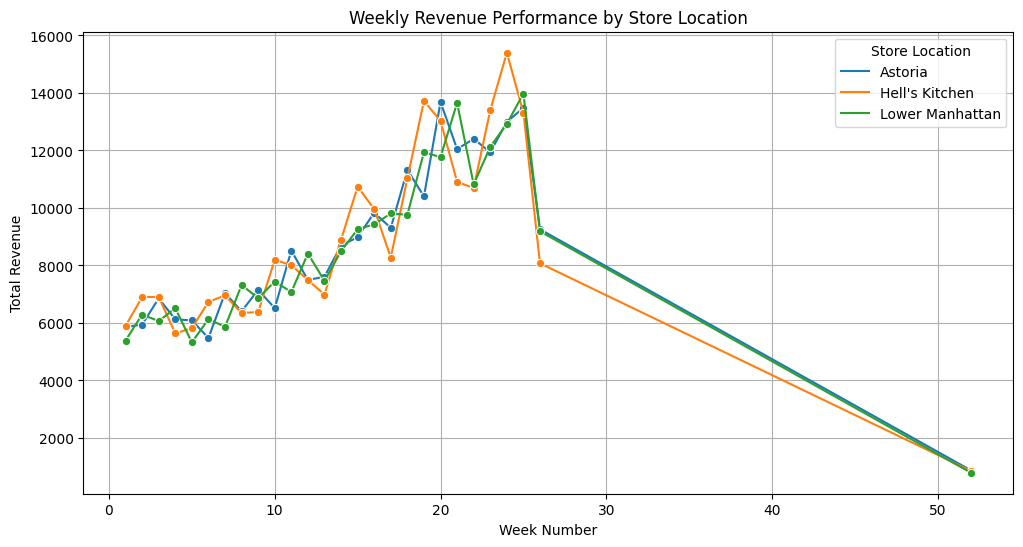

In [46]:
# Plot the weekly total revenue for each store location
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_store_performance, x='transaction_week', y='revenue', hue='store_location', marker='o')

# Customize plot
plt.title("Weekly Revenue Performance by Store Location")
plt.xlabel("Week Number")
plt.ylabel("Total Revenue")
plt.legend(title="Store Location")
plt.grid(True)
plt.show()

### Perform BCG Analysis for Product Types

Classify products into Stars, Cash Cows, Dogs, and Question Marks based on their market growth and sales share to guide strategic decision-making on product focus.

In [25]:
total_revenue = df['revenue'].sum()

In [26]:
total_revenue = df['revenue'].sum()

name_performance = df.groupby('product_name').agg({'revenue': 'sum', 'transaction_id': 'count'}).reset_index()
cat_performance = df.groupby('product_category').agg({'revenue': 'sum', 'transaction_id': 'count'}).reset_index()
type_performance = df.groupby('product_type').agg({'revenue': 'sum', 'transaction_id': 'count'}).reset_index()

In [27]:
total_revenue_name = name_performance['revenue'].sum()
total_revenue_cat = cat_performance['revenue'].sum()
total_revenue_type = type_performance['revenue'].sum()

name_performance['market_share'] = (name_performance['revenue'] / total_revenue_name) * 100
cat_performance['market_share'] = (cat_performance['revenue'] / total_revenue_cat) * 100
type_performance['market_share'] = (type_performance['revenue'] / total_revenue_type) * 100

In [33]:
name_monthly_revenue = df.groupby(['transaction_month', 'product_name'])['revenue'].sum().reset_index()
cat_monthly_revenue = df.groupby(['transaction_month', 'product_category'])['revenue'].sum().reset_index()
type_monthly_revenue = df.groupby(['transaction_month', 'product_type'])['revenue'].sum().reset_index()

In [34]:
name_revenue_growth = name_monthly_revenue.groupby('product_name')['revenue'].apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100).reset_index()
cat_revenue_growth = cat_monthly_revenue.groupby('product_category')['revenue'].apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100).reset_index()
type_revenue_growth = type_monthly_revenue.groupby('product_type')['revenue'].apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100).reset_index()

name_revenue_growth.columns = ['product_name', 'growth_rate']
cat_revenue_growth.columns = ['product_category', 'growth_rate']
type_revenue_growth.columns = ['product_type', 'growth_rate']

name_performance.rename(columns={'transaction_id': 'transaction_count'}, inplace=True)
cat_performance.rename(columns={'transaction_id': 'transaction_count'}, inplace=True)
type_performance.rename(columns={'transaction_id': 'transaction_count'}, inplace=True)


In [35]:
name_bcg_data = pd.merge(name_performance, name_revenue_growth, on='product_name')

# Calculate thresholds for market share and growth rate
name_market_share_threshold = name_bcg_data['market_share'].median()
name_growth_rate_threshold = name_bcg_data['growth_rate'].median()

# Classify products by market share (Low/High) and growth rate (Low Growth/High Growth)
name_bcg_data['market_share_class'] = pd.cut(
    name_bcg_data['market_share'],
    bins=[-float('inf'), name_market_share_threshold, float('inf')],
    labels=['Low', 'High']
)

name_bcg_data['growth_rate_class'] = pd.cut(
    name_bcg_data['growth_rate'],
    bins=[-float('inf'), name_growth_rate_threshold, float('inf')],
    labels=['Low Growth', 'High Growth']
)

# Combine classifications into a single category
name_bcg_data['BCG_category'] = name_bcg_data['market_share_class'].astype(str) + name_bcg_data['growth_rate_class'].astype(str)

# Mapping combined categories to BCG Matrix types
name_bcg_data['BCG_category'] = name_bcg_data['BCG_category'].map({
    'LowLow Growth': 'Dogs',
    'LowHigh Growth': 'Question Marks',
    'HighLow Growth': 'Cash Cows',
    'HighHigh Growth': 'Stars'
})

# Display the results
name_bcg_data[['product_name', 'market_share', 'growth_rate', 'BCG_category']]

,product_name,market_share,growth_rate,BCG_category
0,Almond Croissant,1.025759,110.301235,Question Marks
1,Brazilian,5.401522,90.384240,Cash Cows
2,Brazilian - Organic,0.551221,170.000000,Question Marks
3,Cappuccino,4.813775,117.271615,Stars
4,Carmel,0.294900,87.925697,Dogs
5,Chili Mayan,0.282313,77.777778,Dogs
6,Chocolate,0.304288,91.640867,Dogs
7,Chocolate Chip Biscotti,0.965776,115.693935,Question Marks
8,Chocolate Croissant,1.663677,104.187927,Stars
9,Civet Cat,1.674269,108.108108,Stars


In [36]:
cat_bcg_data = pd.merge(cat_performance, cat_revenue_growth, on='product_category')

# Calculate thresholds for market share and growth rate
cat_market_share_threshold = cat_bcg_data['market_share'].median()
cat_growth_rate_threshold = cat_bcg_data['growth_rate'].median()

# Classify products by market share (Low/High) and growth rate (Low Growth/High Growth)
cat_bcg_data['market_share_class'] = pd.cut(
    cat_bcg_data['market_share'],
    bins=[-float('inf'), cat_market_share_threshold, float('inf')],
    labels=['Low', 'High']
)

cat_bcg_data['growth_rate_class'] = pd.cut(
    cat_bcg_data['growth_rate'],
    bins=[-float('inf'), cat_growth_rate_threshold, float('inf')],
    labels=['Low Growth', 'High Growth']
)

# Combine classifications into a single category
cat_bcg_data['BCG_category'] = cat_bcg_data['market_share_class'].astype(str) + cat_bcg_data['growth_rate_class'].astype(str)

# Mapping combined categories to BCG Matrix types
cat_bcg_data['BCG_category'] = cat_bcg_data['BCG_category'].map({
    'LowLow Growth': 'Dogs',
    'LowHigh Growth': 'Question Marks',
    'HighLow Growth': 'Cash Cows',
    'HighHigh Growth': 'Stars'
})

# Display the results
cat_bcg_data[['product_category', 'market_share', 'growth_rate', 'BCG_category']]

,product_category,market_share,growth_rate,BCG_category
0,Bakery,11.779363,101.885221,Cash Cows
1,Branded,1.947161,80.582011,Dogs
2,Coffee,38.630178,107.279364,Stars
3,Coffee beans,5.736197,88.983366,Dogs
4,Drinking Chocolate,10.362725,105.163263,Stars
5,Flavours,1.203299,106.075534,Question Marks
6,Loose Tea,1.604665,114.139970,Question Marks
7,Packaged Chocolate,0.630733,90.090815,Dogs
8,Tea,28.105679,104.417170,Cash Cows


In [37]:
type_bcg_data = pd.merge(type_performance, type_revenue_growth, on='product_type')

# Calculate thresholds for market share and growth rate
type_market_share_threshold = type_bcg_data['market_share'].median()
type_growth_rate_threshold = type_bcg_data['growth_rate'].median()

# Classify products by market share (Low/High) and growth rate (Low Growth/High Growth)
type_bcg_data['market_share_class'] = pd.cut(
    type_bcg_data['market_share'],
    bins=[-float('inf'), type_market_share_threshold, float('inf')],
    labels=['Low', 'High']
)

type_bcg_data['growth_rate_class'] = pd.cut(
    type_bcg_data['growth_rate'],
    bins=[-float('inf'), type_growth_rate_threshold, float('inf')],
    labels=['Low Growth', 'High Growth']
)

# Combine classifications into a single category
type_bcg_data['BCG_category'] = type_bcg_data['market_share_class'].astype(str) + type_bcg_data['growth_rate_class'].astype(str)

# Mapping combined categories to BCG Matrix types
type_bcg_data['BCG_category'] = type_bcg_data['BCG_category'].map({
    'LowLow Growth': 'Dogs',
    'LowHigh Growth': 'Question Marks',
    'HighLow Growth': 'Cash Cows',
    'HighHigh Growth': 'Stars'
})

# Display the results
type_bcg_data[['product_type', 'market_share', 'growth_rate', 'BCG_category']]

,product_type,market_share,growth_rate,BCG_category
0,Barista Espresso,13.080221,108.962643,Stars
1,Biscotti,2.832453,101.787090,Cash Cows
2,Black tea,0.388066,66.666667,Dogs
3,Brewed Black tea,6.859066,105.049228,Stars
4,Brewed Chai tea,11.030422,107.592921,Stars
5,Brewed Green tea,3.413291,90.514999,Cash Cows
6,Brewed herbal tea,6.802899,106.027750,Stars
7,Chai tea,0.615509,208.582964,Question Marks
8,Clothing,0.881925,54.563492,Dogs
9,Drinking Chocolate,0.390382,93.268927,Dogs


### Identify Peak Sales Times and Days


Analyze sales patterns by day of the week and time of day to understand when stores experience the highest traffic. This can help optimize staffing and inventory levels.

In [38]:
# Create a list to hold DataFrames for each day
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_dfs = {}

# Loop through each day and create a separate DataFrame for each
for day in days:
    day_df = df[df['transaction_day'] == day].groupby('transaction_hour').agg({
        'transaction_qty': 'sum',
        'revenue': 'sum'
    }).reset_index()
    
    # Sort by transaction hour
    day_df = day_df.sort_values(by='transaction_hour').reset_index(drop=True)
    
    # Store the DataFrame in a dictionary
    day_dfs[day] = day_df

In [39]:
# Create a combined DataFrame with transaction_hour as index and columns for each day
combined_df = pd.DataFrame()

# Loop through the dictionary to populate the combined DataFrame
for day, day_df in day_dfs.items():
    combined_df[day] = day_df.set_index('transaction_hour')['revenue']

# Fill NaN values with 0 (if any hours are missing)
combined_df.fillna(0, inplace=True)

# Reset index to make transaction_hour a column
combined_df.reset_index(inplace=True)

# Display the combined DataFrame
combined_df

,transaction_hour,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,6,3098.58,2320.25,3396.23,3464.90,3385.73,2913.85,3320.73
1,7,9516.52,8841.71,8905.86,9209.23,9386.04,8775.02,8892.09
2,8,11604.69,12950.19,11991.45,11420.49,11746.65,11370.86,11615.54
3,9,11898.33,13588.47,12246.40,10963.73,12750.00,11333.85,12388.75
4,10,12427.25,13497.68,12382.48,12091.09,13155.66,12736.48,12382.75
5,11,7179.09,5877.41,7055.85,6898.55,6827.84,6361.41,6118.99
6,12,6139.64,5172.64,5540.35,6073.93,5685.49,5957.75,5622.99
7,13,5771.26,5443.46,6223.15,5972.46,5499.49,5549.45,5908.18
8,14,6463.31,5621.56,5872.42,6114.61,5840.33,5626.89,5765.62
9,15,6159.49,5852.24,5974.31,6087.68,6098.13,5946.50,5614.75


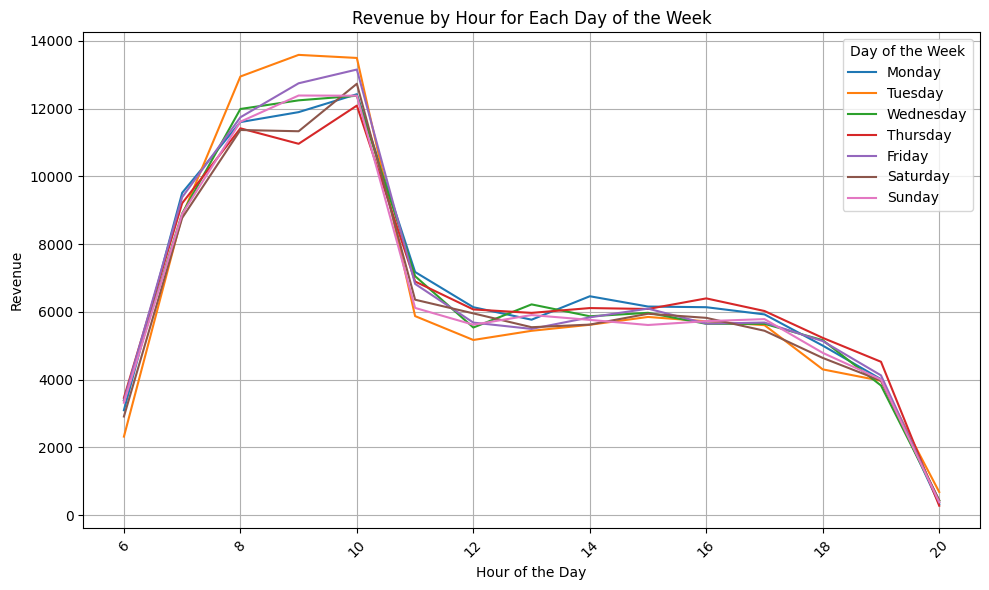

In [40]:
import matplotlib.pyplot as plt

# Plot revenue for each day
plt.figure(figsize=(10,6))

for day in days:
    plt.plot(combined_df['transaction_hour'], combined_df[day], label=day)

# Add labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Revenue')
plt.title('Revenue by Hour for Each Day of the Week')
plt.legend(title="Day of the Week")

# Show the plot
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [41]:
# df['transaction_month_name'] = df['transaction_date'].dt.month_name()

month_order = ['January', 'February', 'March', 'April', 'May', 'June']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df['transaction_month_name'] = pd.Categorical(df['transaction_month_name'], categories=month_order, ordered=True)
df['transaction_day'] = pd.Categorical(df['transaction_day'], categories=day_order, ordered=True)


monthly_day_revenue = df.groupby(['transaction_month_name', 'transaction_day']).agg({
    'revenue': 'sum',
    'transaction_id': 'count'  # Transaction count
}).reset_index()

monthly_day_revenue.rename(columns={'transaction_id': 'transaction_count'}, inplace=True)
monthly_day_revenue

C:\Users\user\AppData\Local\Temp\ipykernel_7760\209146396.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_day_revenue = df.groupby(['transaction_month_name', 'transaction_day']).agg({


,transaction_month_name,transaction_day,revenue,transaction_count
0,January,Monday,13238.68,2814
1,January,Tuesday,13739.53,2766
2,January,Wednesday,10358.36,2229
3,January,Thursday,10523.26,2283
4,January,Friday,10653.28,2291
5,January,Saturday,10422.11,2206
6,January,Sunday,12742.52,2725
7,February,Monday,11092.51,2373
8,February,Tuesday,10203.11,2199
9,February,Wednesday,11085.48,2350


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


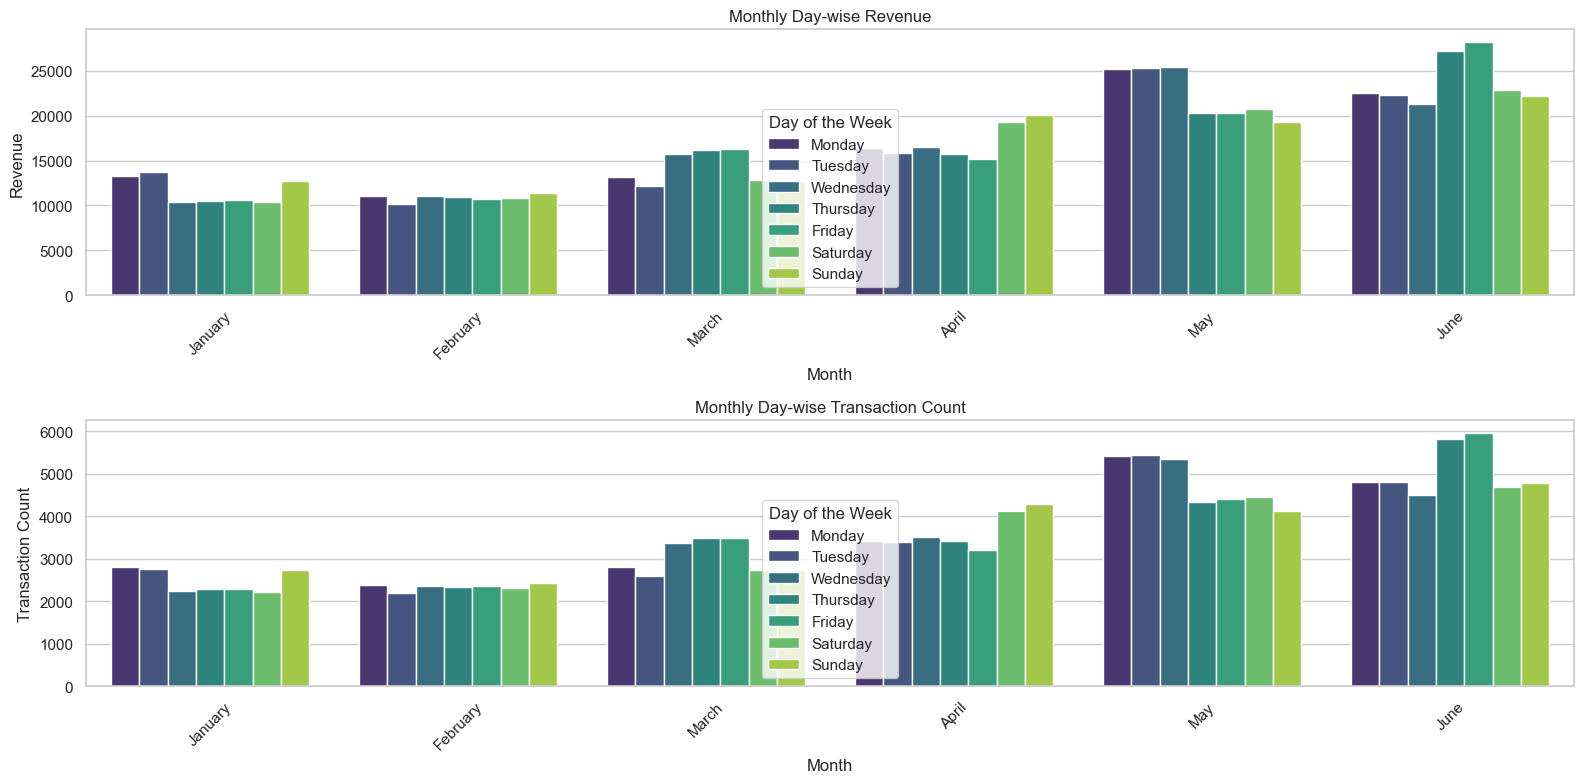

In [42]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

# Barplot for Revenue
plt.subplot(2, 1, 1)
sns.barplot(x='transaction_month_name', y='revenue', hue='transaction_day', data=monthly_day_revenue, palette='viridis')
plt.title('Monthly Day-wise Revenue')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend(title='Day of the Week')

# Barplot for Transaction Count
plt.subplot(2, 1, 2)
sns.barplot(x='transaction_month_name', y='transaction_count', hue='transaction_day', data=monthly_day_revenue, palette='viridis')
plt.title('Monthly Day-wise Transaction Count')
plt.ylabel('Transaction Count')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend(title='Day of the Week')

plt.tight_layout()
plt.show()

### Explore the Impact of Product Size on Sales

Evaluate whether product size (e.g., small, regular, large) influences sales performance. Investigate if larger sizes drive more revenue or if customers prefer smaller sizes for certain product types.

In [52]:
# Group by product size and product type to analyze sales by size
size_sales = df.groupby(['product_size', 'product_type']).agg({
    'transaction_qty': 'sum',
    'revenue': 'sum'
}).reset_index()

# Sort by total revenue to see which sizes perform best
size_performance = size_sales.sort_values(by='revenue', ascending=False)

# Display performance of product sizes
print("Product Size Performance:")
size_performance


Product Size Performance:


,product_size,product_type,transaction_qty,revenue
2,large,Brewed Chai tea,12924,43558.40
7,large,Hot chocolate,9121,42157.75
44,unknown,Scone,10465,36866.12
12,regular,Brewed Chai tea,13326,33523.55
27,unknown,Barista Espresso,8868,33255.00
17,regular,Hot chocolate,8336,30258.25
6,large,Gourmet brewed coffee,8422,27379.50
1,large,Brewed Black tea,8554,25662.00
42,unknown,Pastry,6961,25655.99
4,large,Brewed herbal tea,8439,25317.00


In [55]:
# Filter out rows where product_size is 'unknown'
test = df[df['product_size'].isin(['large', 'regular', 'small'])]

# Group by product size and product type to analyze sales by size
size_sales = test.groupby(['product_size', 'product_type', 'product_category']).agg({
    'transaction_qty': 'sum',
    'revenue': 'sum'
}).reset_index()

# Sort by total revenue to see which sizes perform best
size_performance = size_sales.sort_values(by='revenue', ascending=False)

# Display performance of product sizes
print("Product Size Performance:")
size_performance

Product Size Performance:


,product_size,product_type,product_category,transaction_qty,revenue
2,large,Brewed Chai tea,Tea,12924,43558.40
7,large,Hot chocolate,Drinking Chocolate,9121,42157.75
12,regular,Brewed Chai tea,Tea,13326,33523.55
17,regular,Hot chocolate,Drinking Chocolate,8336,30258.25
6,large,Gourmet brewed coffee,Coffee,8422,27379.50
1,large,Brewed Black tea,Tea,8554,25662.00
4,large,Brewed herbal tea,Tea,8439,25317.00
16,regular,Gourmet brewed coffee,Coffee,8940,24546.50
11,regular,Brewed Black tea,Tea,8908,22270.00
14,regular,Brewed herbal tea,Tea,8889,22222.50


In [59]:
# Filter to include only coffee products
cof_category = test[test['product_category'] == 'Coffee']

# Group and analyze
cof_size_sales = cof_category.groupby(['product_size', 'product_type']).agg({
    'transaction_qty': 'sum',
    'revenue': 'sum'
}).reset_index()

# Sort and display
cof_size_performance = cof_size_sales.sort_values(by='revenue', ascending=False)
print("Product Size Performance for Coffee:")
cof_size_performance

Product Size Performance for Coffee:


,product_size,product_type,transaction_qty,revenue
2,large,Gourmet brewed coffee,8422,27379.50
7,regular,Gourmet brewed coffee,8940,24546.50
5,regular,Barista Espresso,4497,19112.25
11,small,Gourmet brewed coffee,8611,18108.60
0,large,Barista Espresso,4151,17641.75
4,large,Premium brewed coffee,4395,16481.25
3,large,Organic brewed coffee,4317,15109.50
8,regular,Organic brewed coffee,4385,13155.00
9,regular,Premium brewed coffee,4018,12455.80
1,large,Drip coffee,3997,11991.00


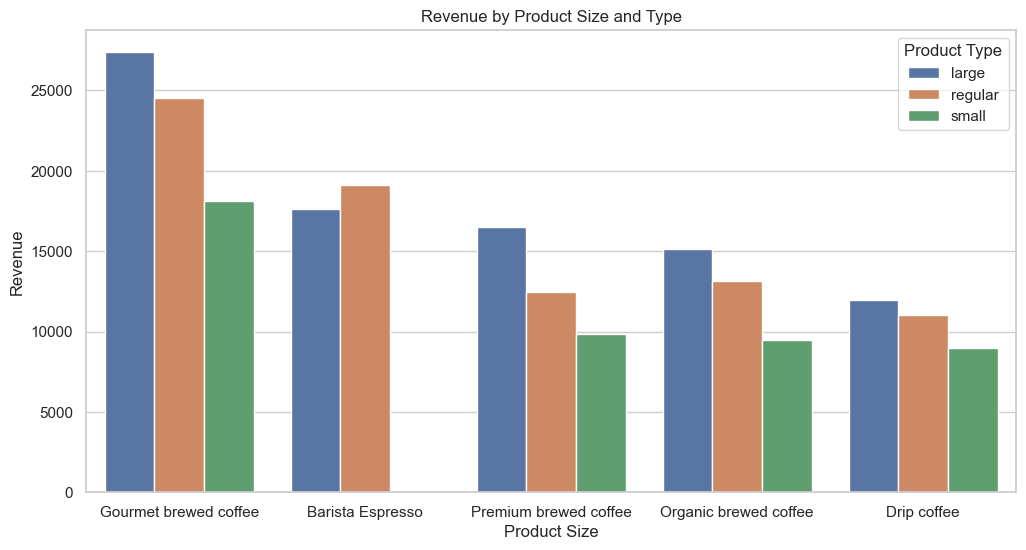

In [61]:
plt.figure(figsize=(12, 6))
sns.barplot(data=cof_size_performance, x='product_type', y='revenue', hue='product_size')
plt.title('Revenue by Product Size and Type')
plt.ylabel('Revenue')
plt.xlabel('Product Size')
plt.legend(title='Product Type')
plt.show()

In [57]:
# Filter to include only coffee products
tea_category = test[test['product_category'] == 'Tea']

# Group and analyze
tea_size_sales = tea_category.groupby(['product_size', 'product_type']).agg({
    'transaction_qty': 'sum',
    'revenue': 'sum'
}).reset_index()

# Sort and display
tea_size_performance = tea_size_sales.sort_values(by='revenue', ascending=False)
print("Product Size Performance for Tea:")
tea_size_performance

Product Size Performance for Tea:


,product_size,product_type,transaction_qty,revenue
1,large,Brewed Chai tea,12924,43558.40
5,regular,Brewed Chai tea,13326,33523.55
0,large,Brewed Black tea,8554,25662.00
3,large,Brewed herbal tea,8439,25317.00
4,regular,Brewed Black tea,8908,22270.00
7,regular,Brewed herbal tea,8889,22222.50
2,large,Brewed Green tea,4220,12660.00
6,regular,Brewed Green tea,4477,11192.50


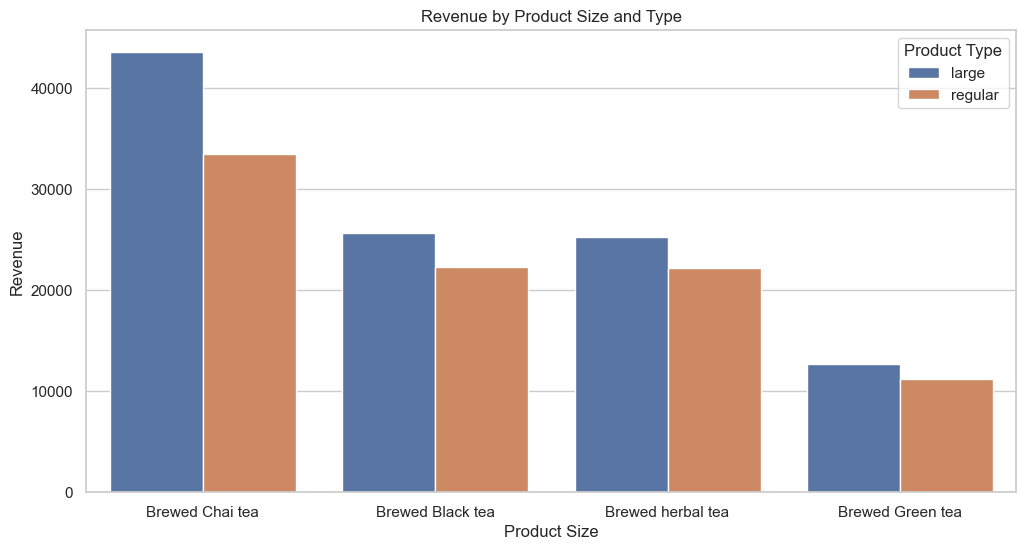

In [62]:
plt.figure(figsize=(12, 6))
sns.barplot(data=tea_size_performance, x='product_type', y='revenue', hue='product_size')
plt.title('Revenue by Product Size and Type')
plt.ylabel('Revenue')
plt.xlabel('Product Size')
plt.legend(title='Product Type')
plt.show()

#### Plain

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a f

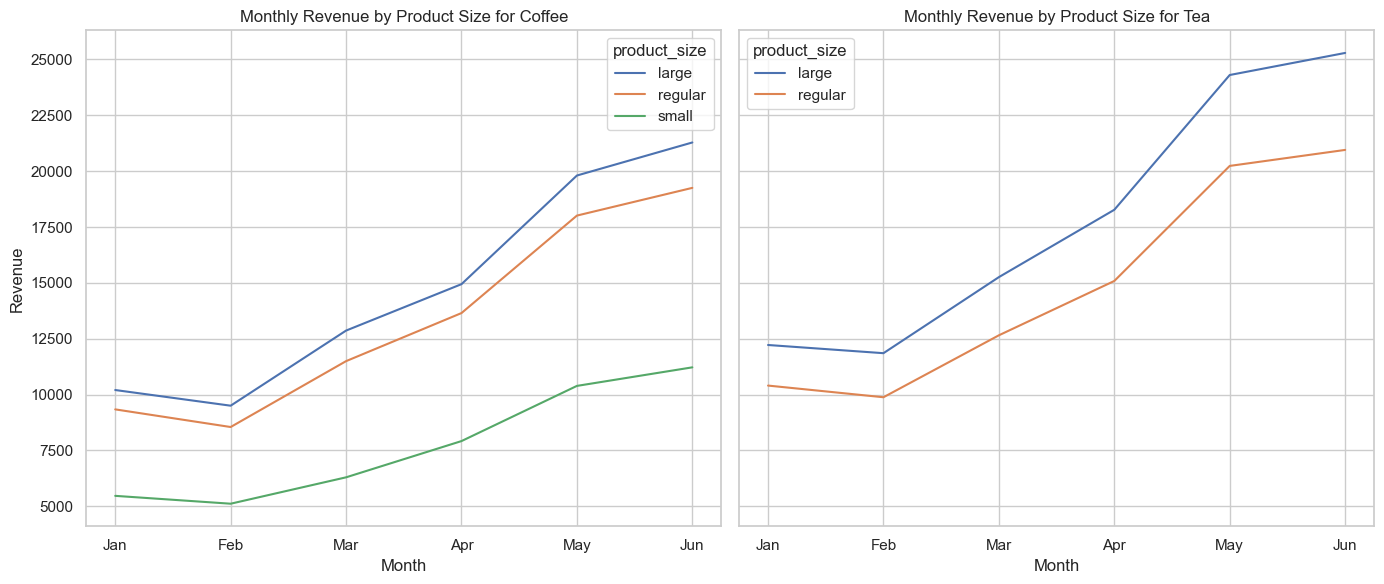

In [72]:
# Filter for specific product sizes and categories
monthly_sales = df[df['product_size'].isin(['large', 'regular', 'small']) & 
                   df['product_category'].isin(['Coffee', 'Tea'])].groupby(['transaction_month', 'product_category', 'product_size']).agg({
    'revenue': 'sum'
}).reset_index()

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot revenue for Coffee
sns.lineplot(data=monthly_sales[monthly_sales['product_category'] == 'Coffee'],
             x='transaction_month', y='revenue', hue='product_size', markers=True, dashes=False, ax=axes[0])
axes[0].set_title('Monthly Revenue by Product Size for Coffee')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Revenue')
axes[0].set_xticks(ticks=range(1, 7))
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])  # Assuming 6 months

# Plot revenue for Tea
sns.lineplot(data=monthly_sales[monthly_sales['product_category'] == 'Tea'],
             x='transaction_month', y='revenue', hue='product_size', markers=True, dashes=False, ax=axes[1])
axes[1].set_title('Monthly Revenue by Product Size for Tea')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Revenue')
axes[1].set_xticks(ticks=range(1, 7))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])  # Assuming 6 months

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a f

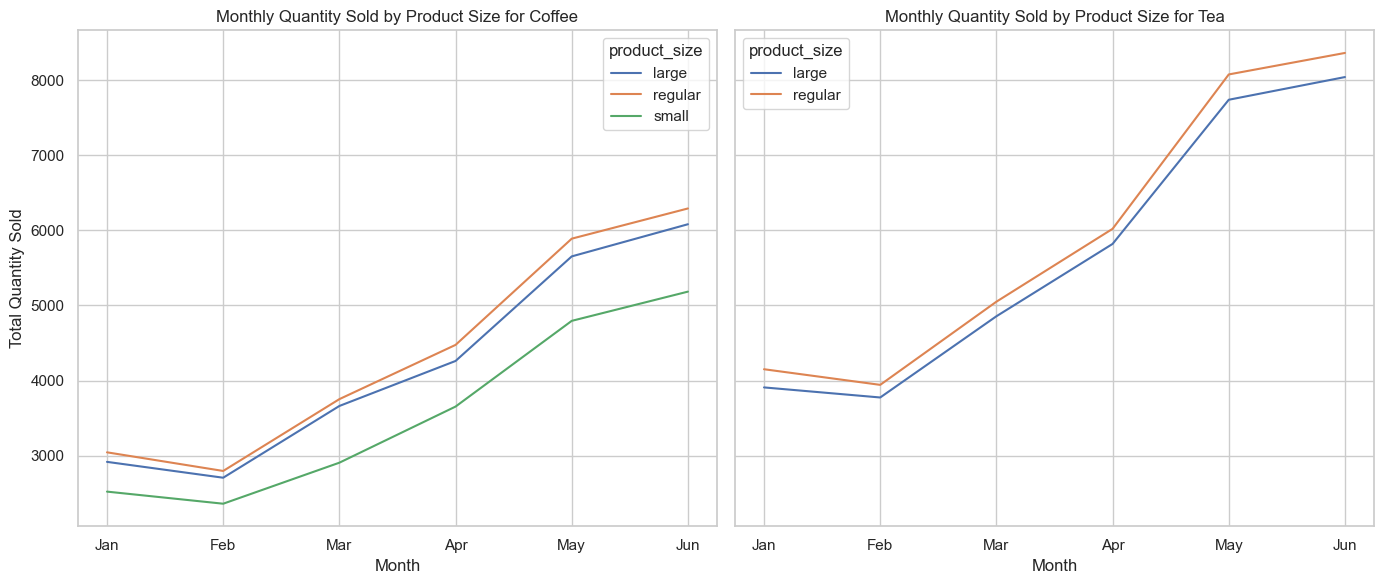

In [73]:
# Group by transaction_month, product_size, and product_category to analyze total quantity sold
monthly_quantity_sales = df[df['product_size'].isin(['large', 'regular', 'small']) & 
                             df['product_category'].isin(['Coffee', 'Tea'])].groupby(['transaction_month', 'product_category', 'product_size']).agg({
    'transaction_qty': 'sum'
}).reset_index()

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot quantity sold for Coffee
sns.lineplot(data=monthly_quantity_sales[monthly_quantity_sales['product_category'] == 'Coffee'],
             x='transaction_month', y='transaction_qty', hue='product_size', markers=True, dashes=False, ax=axes[0])
axes[0].set_title('Monthly Quantity Sold by Product Size for Coffee')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Total Quantity Sold')
axes[0].set_xticks(ticks=range(1, 7))
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])  # Assuming 6 months

# Plot quantity sold for Tea
sns.lineplot(data=monthly_quantity_sales[monthly_quantity_sales['product_category'] == 'Tea'],
             x='transaction_month', y='transaction_qty', hue='product_size', markers=True, dashes=False, ax=axes[1])
axes[1].set_title('Monthly Quantity Sold by Product Size for Tea')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Total Quantity Sold')
axes[1].set_xticks(ticks=range(1, 7))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])  # Assuming 6 months

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a f

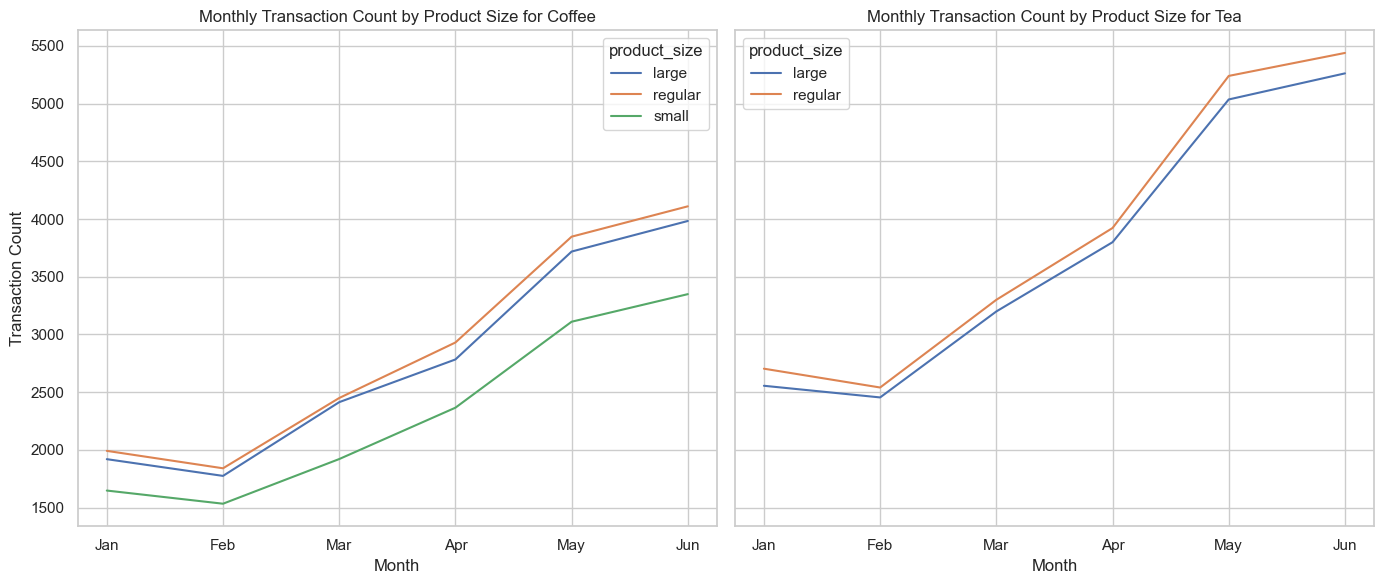

In [74]:
# Group by transaction_month, product_size, and product_category to analyze transaction count
monthly_transaction_count = df[df['product_size'].isin(['large', 'regular', 'small']) & 
                                df['product_category'].isin(['Coffee', 'Tea'])].groupby(['transaction_month', 'product_category', 'product_size']).agg({
    'transaction_id': 'count'
}).reset_index()

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot transaction count for Coffee
sns.lineplot(data=monthly_transaction_count[monthly_transaction_count['product_category'] == 'Coffee'],
             x='transaction_month', y='transaction_id', hue='product_size', markers=True, dashes=False, ax=axes[0])
axes[0].set_title('Monthly Transaction Count by Product Size for Coffee')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Transaction Count')
axes[0].set_xticks(ticks=range(1, 7))
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])  # Assuming 6 months

# Plot transaction count for Tea
sns.lineplot(data=monthly_transaction_count[monthly_transaction_count['product_category'] == 'Tea'],
             x='transaction_month', y='transaction_id', hue='product_size', markers=True, dashes=False, ax=axes[1])
axes[1].set_title('Monthly Transaction Count by Product Size for Tea')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Transaction Count')
axes[1].set_xticks(ticks=range(1, 7))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])  # Assuming 6 months

# Show the plot
plt.tight_layout()
plt.show()


#### Detailed

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a f

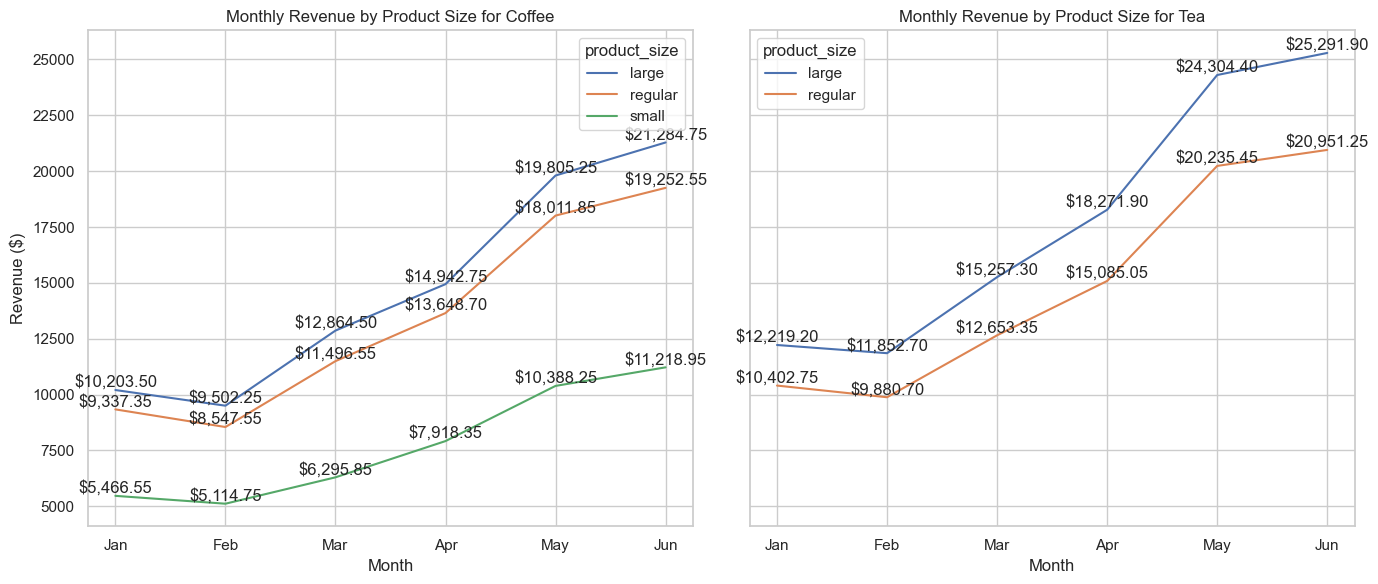

In [82]:
# Group by transaction_month, product_size, and product_category to analyze revenue
monthly_revenue = df[df['product_size'].isin(['large', 'regular', 'small']) &
                      df['product_category'].isin(['Coffee', 'Tea'])].groupby(['transaction_month', 'product_category', 'product_size']).agg({
    'revenue': 'sum'
}).reset_index()
                    
                    
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot revenue for Coffee
coffee_revenue_plot = sns.lineplot(data=monthly_revenue[monthly_revenue['product_category'] == 'Coffee'],
             x='transaction_month', y='revenue', hue='product_size', markers=True, dashes=False, ax=axes[0])

# Adding data labels to Coffee Revenue plot
for line in coffee_revenue_plot.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        axes[0].text(x, y, f'${y:,.2f}', ha='center', va='bottom')

axes[0].set_title('Monthly Revenue by Product Size for Coffee')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Revenue ($)')
axes[0].set_xticks(ticks=range(1, 7))
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])  # Assuming 6 months

# Plot revenue for Tea
tea_revenue_plot = sns.lineplot(data=monthly_revenue[monthly_revenue['product_category'] == 'Tea'],
             x='transaction_month', y='revenue', hue='product_size', markers=True, dashes=False, ax=axes[1])

# Adding data labels to Tea Revenue plot
for line in tea_revenue_plot.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        axes[1].text(x, y, f'${y:,.2f}', ha='center', va='bottom')

axes[1].set_title('Monthly Revenue by Product Size for Tea')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Revenue ($)')
axes[1].set_xticks(ticks=range(1, 7))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])  # Assuming 6 months

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a f

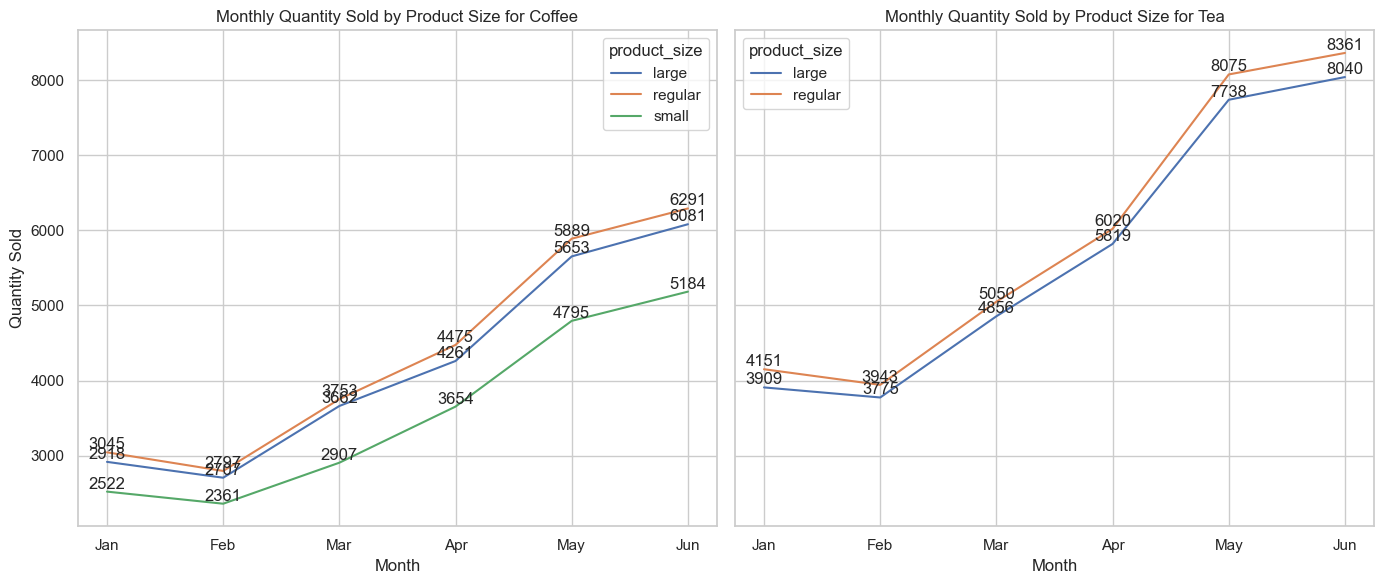

In [81]:
# Group by transaction_month, product_size, and product_category to analyze quantity sold
monthly_quantity_sold = df[df['product_size'].isin(['large', 'regular', 'small']) &
                            df['product_category'].isin(['Coffee', 'Tea'])].groupby(['transaction_month', 'product_category', 'product_size']).agg({
    'transaction_qty': 'sum'
}).reset_index()
                            
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot quantity sold for Coffee
coffee_qty_plot = sns.lineplot(data=monthly_quantity_sold[monthly_quantity_sold['product_category'] == 'Coffee'],
             x='transaction_month', y='transaction_qty', hue='product_size', markers=True, dashes=False, ax=axes[0])

# Adding data labels to Coffee Quantity Sold plot
for line in coffee_qty_plot.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        axes[0].text(x, y, int(y), ha='center', va='bottom')

axes[0].set_title('Monthly Quantity Sold by Product Size for Coffee')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Quantity Sold')
axes[0].set_xticks(ticks=range(1, 7))
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])  # Assuming 6 months

# Plot quantity sold for Tea
tea_qty_plot = sns.lineplot(data=monthly_quantity_sold[monthly_quantity_sold['product_category'] == 'Tea'],
             x='transaction_month', y='transaction_qty', hue='product_size', markers=True, dashes=False, ax=axes[1])

# Adding data labels to Tea Quantity Sold plot
for line in tea_qty_plot.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        axes[1].text(x, y, int(y), ha='center', va='bottom')

axes[1].set_title('Monthly Quantity Sold by Product Size for Tea')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Quantity Sold')
axes[1].set_xticks(ticks=range(1, 7))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])  # Assuming 6 months

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a f

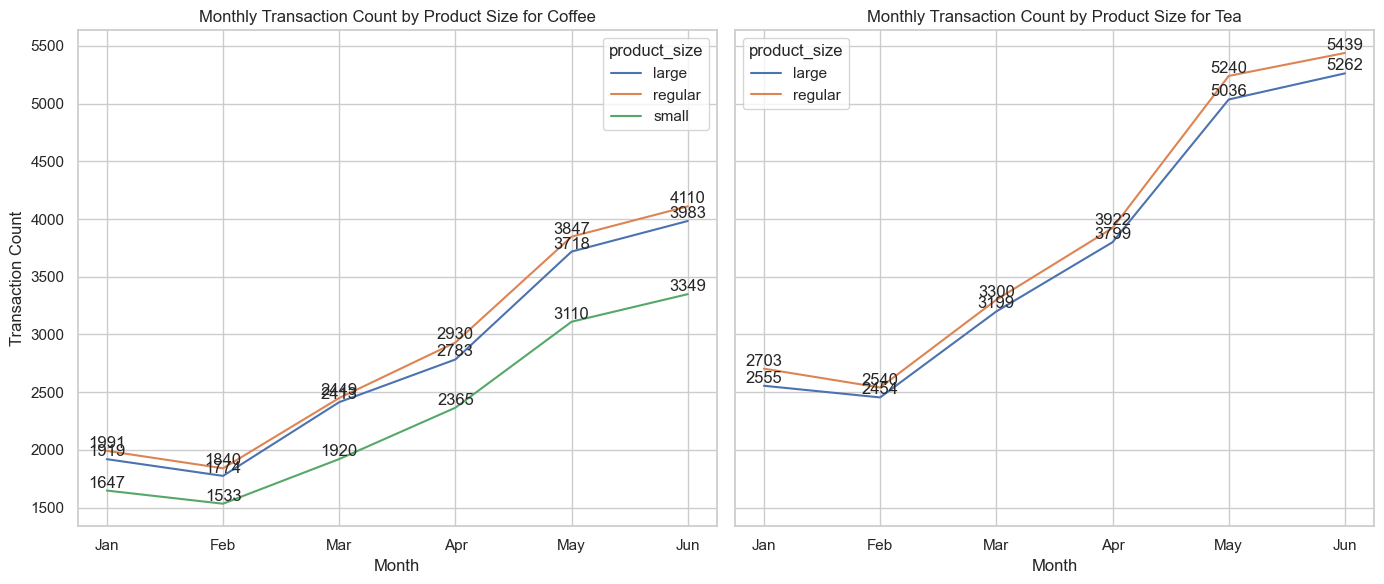

In [78]:
# Group by transaction_month, product_size, and product_category to analyze transaction count
monthly_transaction_count = df[df['product_size'].isin(['large', 'regular', 'small']) & 
                                df['product_category'].isin(['Coffee', 'Tea'])].groupby(['transaction_month', 'product_category', 'product_size']).agg({
    'transaction_id': 'count'
}).reset_index()

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot transaction count for Coffee
coffee_transaction_count_plot = sns.lineplot(data=monthly_transaction_count[monthly_transaction_count['product_category'] == 'Coffee'],
             x='transaction_month', y='transaction_id', hue='product_size', markers=True, dashes=False, ax=axes[0])

# Adding data labels to Coffee plot
for line in coffee_transaction_count_plot.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        axes[0].text(x, y, int(y), ha='center', va='bottom')

axes[0].set_title('Monthly Transaction Count by Product Size for Coffee')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Transaction Count')
axes[0].set_xticks(ticks=range(1, 7))
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])  # Assuming 6 months

# Plot transaction count for Tea
tea_transaction_count_plot = sns.lineplot(data=monthly_transaction_count[monthly_transaction_count['product_category'] == 'Tea'],
             x='transaction_month', y='transaction_id', hue='product_size', markers=True, dashes=False, ax=axes[1])

# Adding data labels to Tea plot
for line in tea_transaction_count_plot.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        axes[1].text(x, y, int(y), ha='center', va='bottom')

axes[1].set_title('Monthly Transaction Count by Product Size for Tea')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Transaction Count')
axes[1].set_xticks(ticks=range(1, 7))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])  # Assuming 6 months

# Show the plot
plt.tight_layout()
plt.show()


## Insights